**Exploratory Data Analysis**

In [ ]:
#Import necessarry Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Mir Siam_Assignment_2_EDA_/heart_disease_dataset.csv', sep=",", header=0)

In [ ]:
print("Total rows and columns:", data.shape)

Total rows and columns: (1000, 16)


In [ ]:
data.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [ ]:
data.tail(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1
999,53,Male,226,116,82,Current,NaN,6,No,No,Yes,5,161,Yes,Asymptomatic,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [ ]:
data.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [ ]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [ ]:
 data.shape

(1000, 16)

In [ ]:
# Identify categorical columns (object type)
categorical_cols = data.select_dtypes(include='object').columns


In [ ]:
 categorical_cols

Index(['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes',
       'Obesity', 'Exercise Induced Angina', 'Chest Pain Type'],
      dtype='object')

In [ ]:
# Identify categorical columns (object type)
categorical_cols = data.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Identify numerical columns (excluding the target variable 'Heart Disease')
numerical_cols = data_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Heart Disease')

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the dataframe after normalization
display(data_encoded.head())

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease,Gender_Male,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,1.444534,-0.379005,-0.617287,-1.150139,-1.203298,0.831917,-0.434581,1,False,False,False,False,False,False,True,True,True,False,False
1,-0.273104,-0.793616,1.126782,-1.498561,0.160599,1.185323,-1.770413,0,True,False,False,False,False,False,False,True,False,False,True
2,0.044977,-0.275353,-1.678894,-1.063034,-0.521350,-0.228300,1.664583,1,True,False,True,False,True,False,True,True,True,False,False
3,1.062836,-1.000921,-1.716808,-0.627507,-0.180375,0.478511,-0.761724,0,False,False,False,False,False,True,False,True,False,True,False
4,0.617523,-1.346429,1.050953,1.201706,0.501573,-1.288517,1.310178,0,False,False,True,False,False,True,False,True,False,False,False


In [ ]:
# Identify numerical columns (excluding the target variable 'Heart Disease')
numerical_cols = data_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('Heart Disease')

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Display the dataframe after normalization
display(data_encoded.head())

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease,Gender_Male,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,1.444534,-0.379005,-0.617287,-1.150139,-1.203298,0.831917,-0.434581,1,False,False,False,False,False,False,True,True,True,False,False
1,-0.273104,-0.793616,1.126782,-1.498561,0.160599,1.185323,-1.770413,0,True,False,False,False,False,False,False,True,False,False,True
2,0.044977,-0.275353,-1.678894,-1.063034,-0.521350,-0.228300,1.664583,1,True,False,True,False,True,False,True,True,True,False,False
3,1.062836,-1.000921,-1.716808,-0.627507,-0.180375,0.478511,-0.761724,0,False,False,False,False,False,True,False,True,False,True,False
4,0.617523,-1.346429,1.050953,1.201706,0.501573,-1.288517,1.310178,0,False,False,True,False,False,True,False,True,False,False,False


In [ ]:
# Display unique values in the 'Alcohol Intake' column to verify categories
print("Unique values in 'Alcohol Intake' before encoding:", data['Alcohol Intake'].unique())

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

#DataFrame after one-hot encoding:
display(data_encoded.head())

Unique values in 'Alcohol Intake' before encoding: ['Heavy' nan 'Moderate']


,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease,Gender_Male,Smoking_Former,Smoking_Never,Alcohol Intake_Moderate,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,228,119,66,1,8,119,1,False,False,False,False,False,False,True,True,True,False,False
1,48,204,165,62,5,9,70,0,True,False,False,False,False,False,False,True,False,False,True
2,53,234,91,67,3,5,196,1,True,False,True,False,True,False,True,True,True,False,False
3,69,192,90,72,4,7,107,0,False,False,False,False,False,True,False,True,False,True,False
4,62,172,163,93,6,2,183,0,False,False,True,False,False,True,False,True,False,False,False


In [ ]:
# Check for missing values
print(data_encoded.isnull().sum())

Age                                 0
Cholesterol                         0
Blood Pressure                      0
Heart Rate                          0
Exercise Hours                      0
Stress Level                        0
Blood Sugar                         0
Heart Disease                       0
Gender_Male                         0
Smoking_Former                      0
Smoking_Never                       0
Alcohol Intake_Moderate             0
Family History_Yes                  0
Diabetes_Yes                        0
Obesity_Yes                         0
Exercise Induced Angina_Yes         0
Chest Pain Type_Atypical Angina     0
Chest Pain Type_Non-anginal Pain    0
Chest Pain Type_Typical Angina      0
dtype: int64


The `Alcohol Intake` column has missing values. We can fill these missing values with the mode of the column, as it is a categorical variable.


In [ ]:
# Fill missing values in 'Alcohol Intake' with the mode of the original column
data['Alcohol Intake'].fillna(data['Alcohol Intake'].mode()[0], inplace=True)

# Verify missing values are filled in the original column
print(data.isnull().sum())

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64


/tmp/ipython-input-268035268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Alcohol Intake'].fillna(data['Alcohol Intake'].mode()[0], inplace=True)



### Visualizing Distributions of Numerical Features
---



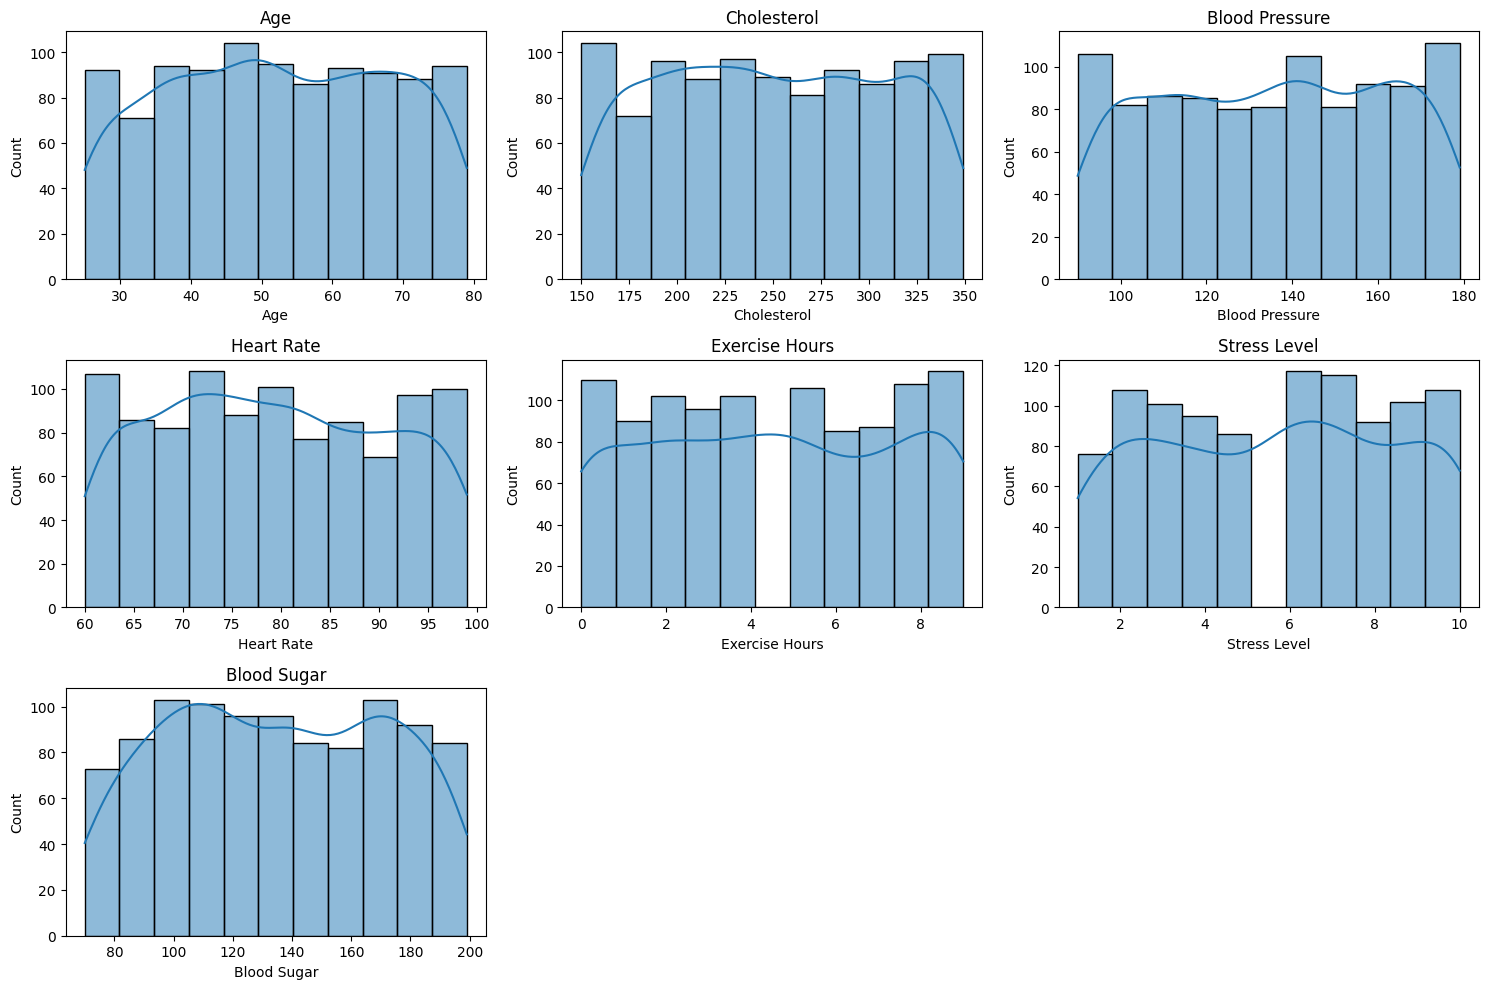

In [ ]:
# Select numerical columns for visualization
numerical_cols_viz = data_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols_viz.remove('Heart Disease') # Exclude target variable

# Create histograms and KDE plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data_encoded[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Visualizing Distributions and Outliers with Boxplots



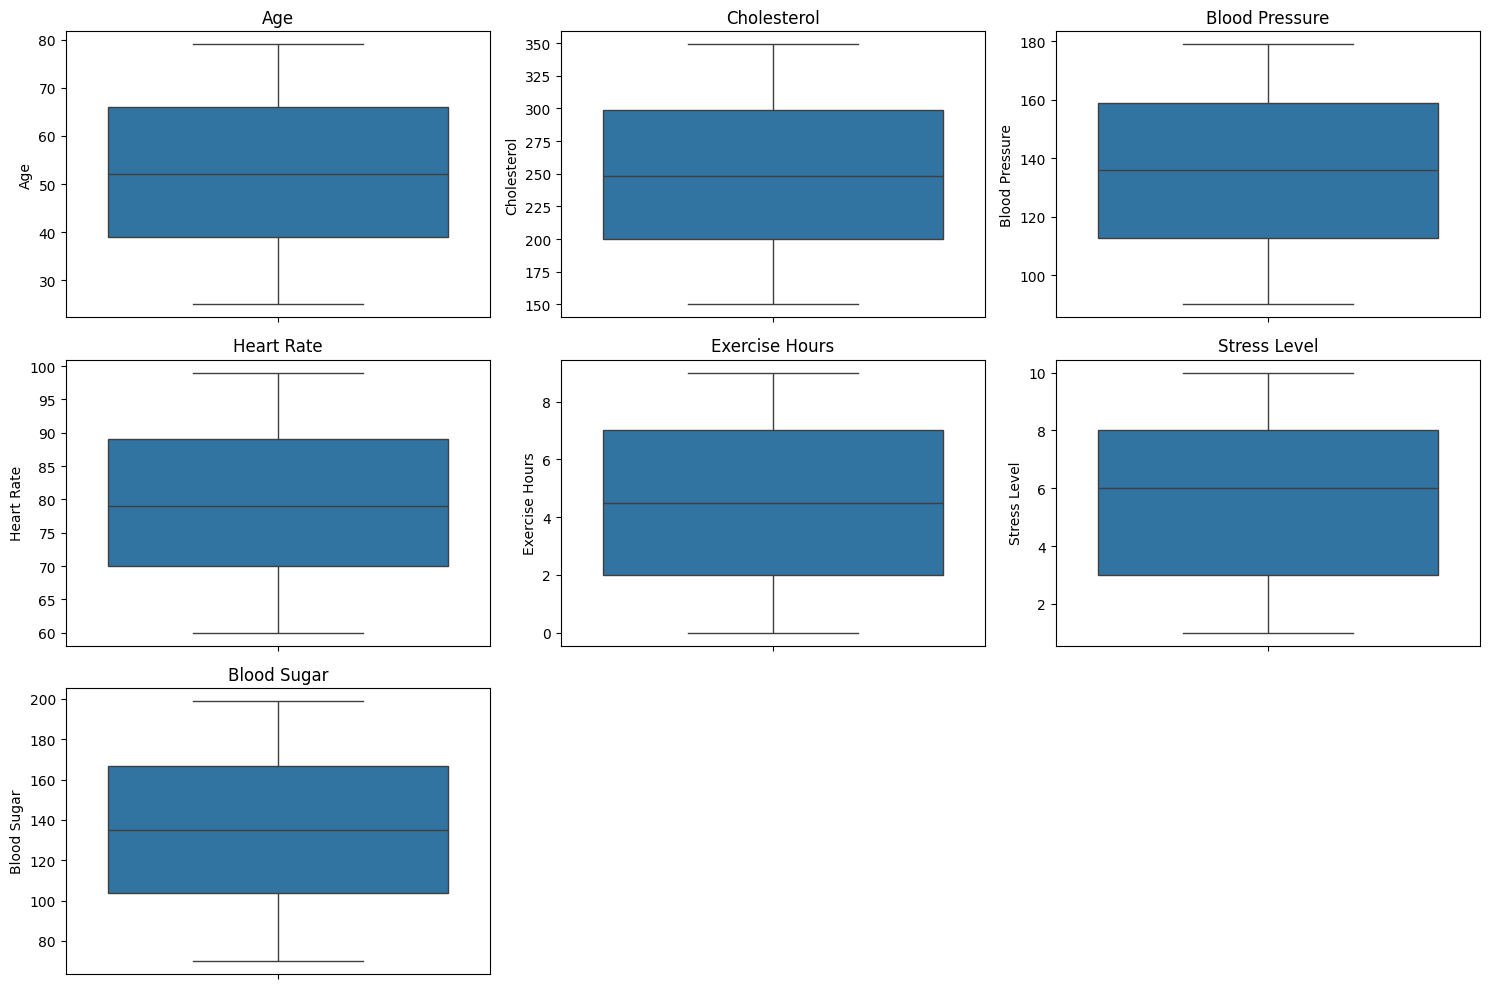

In [ ]:
# Create boxplots for numerical features to visualize distribution and outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Identifying Correlations with a Heatmap

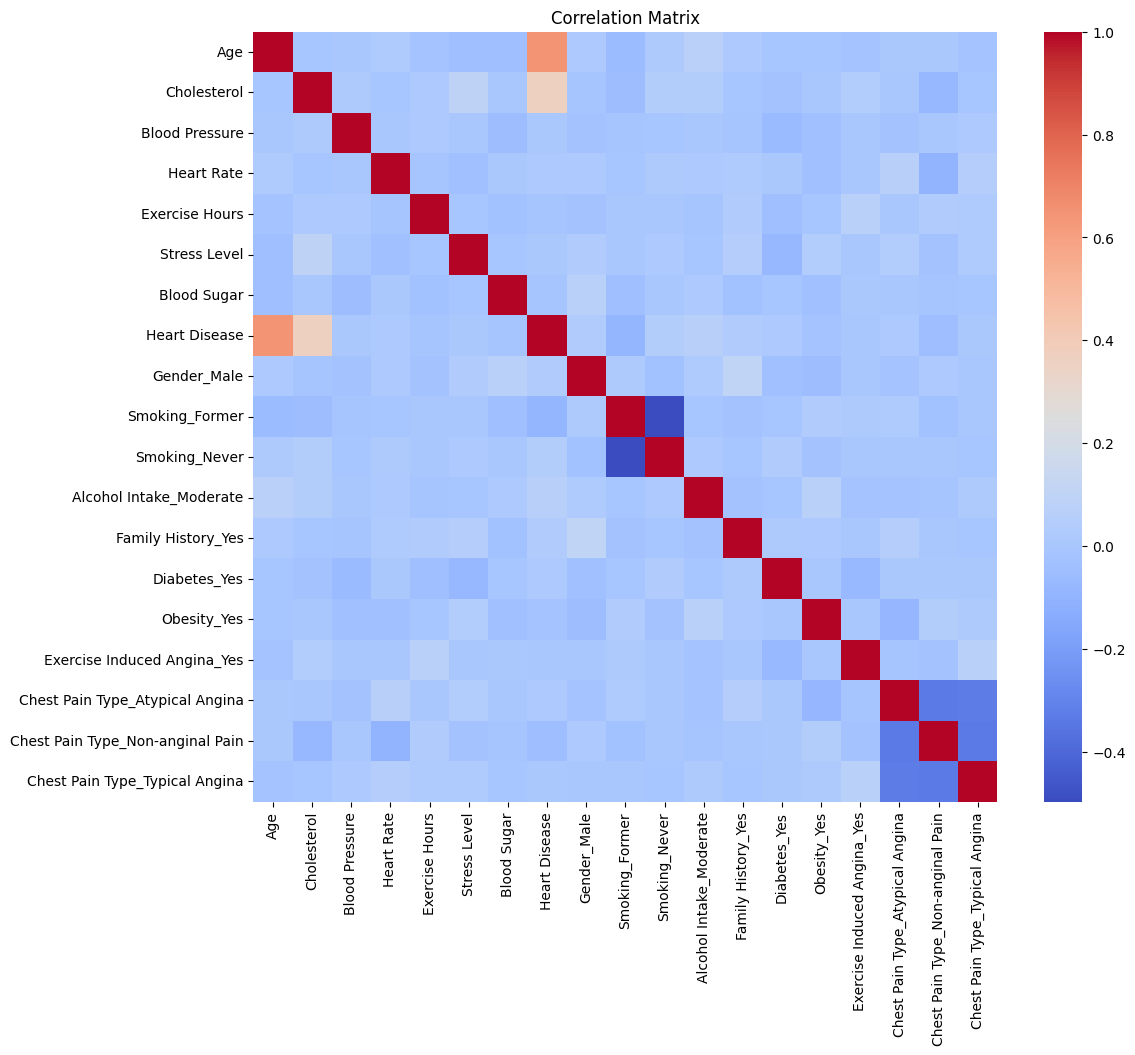

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

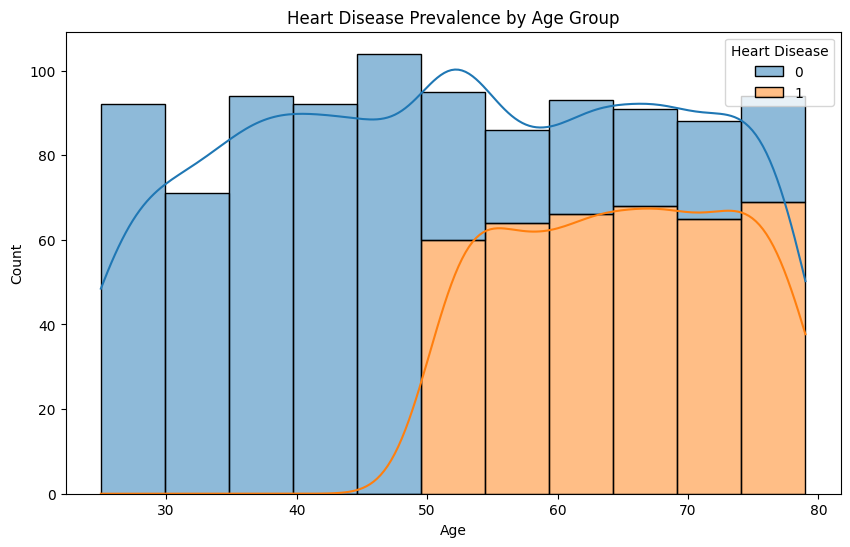

In [ ]:
# Custom Visualization: Heart Disease Prevalence by Age Group
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Heart Disease', multiple='stack', kde=True)
plt.title('Heart Disease Prevalence by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Univariate Analysis: Categorical Features

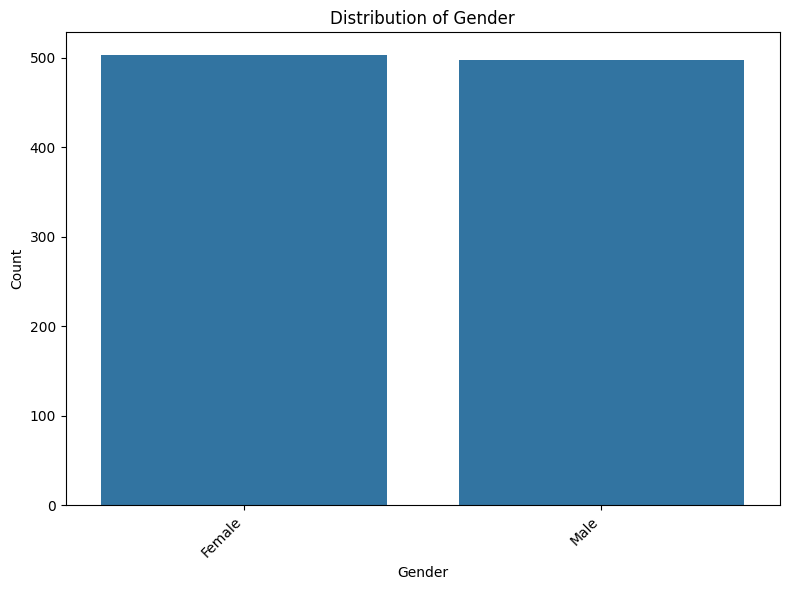

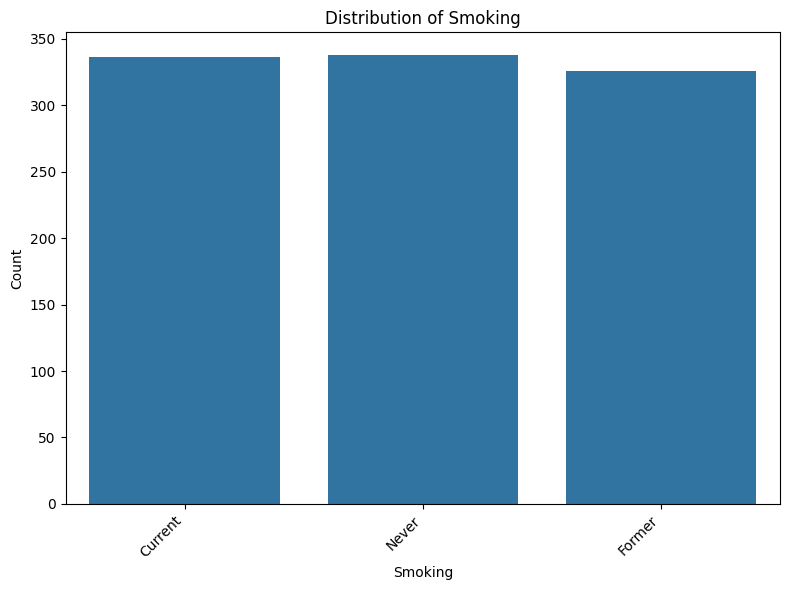

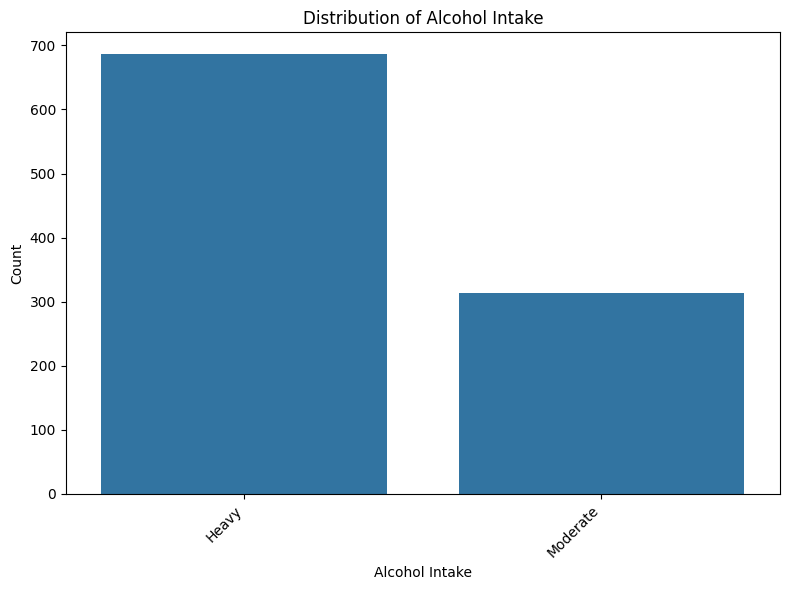

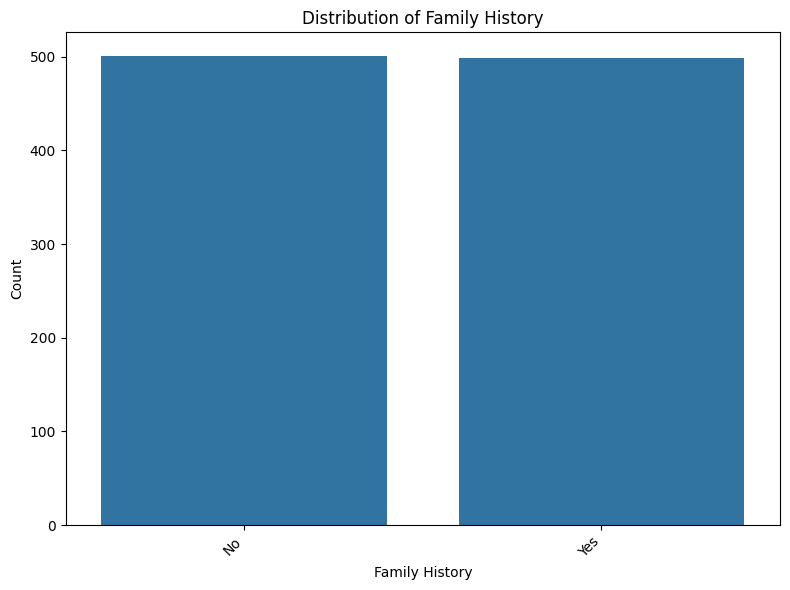

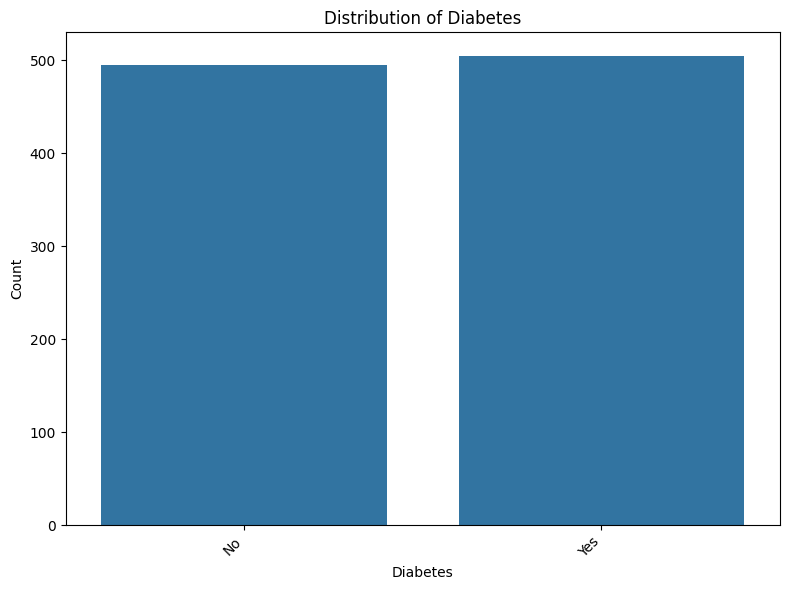

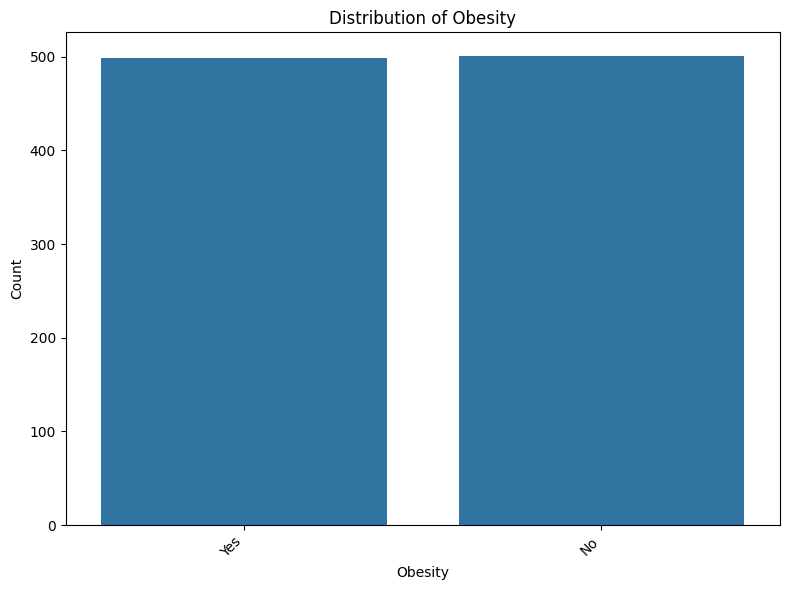

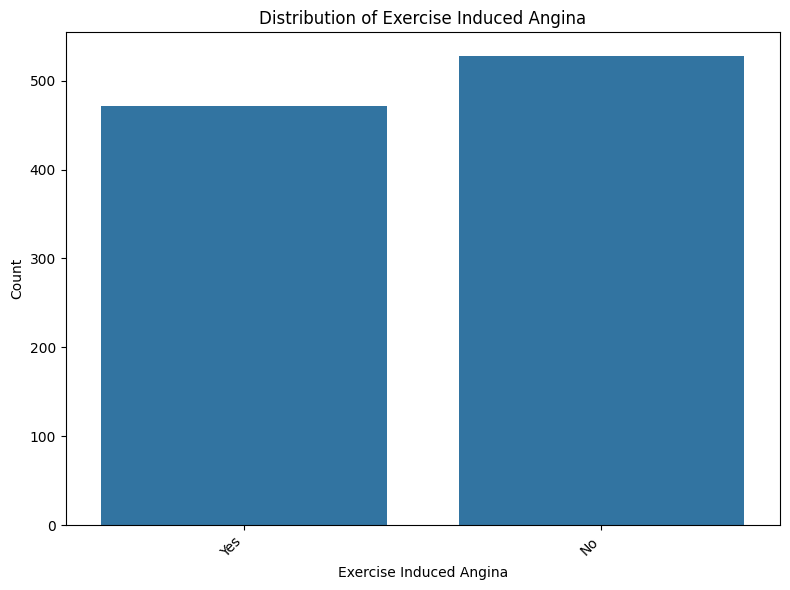

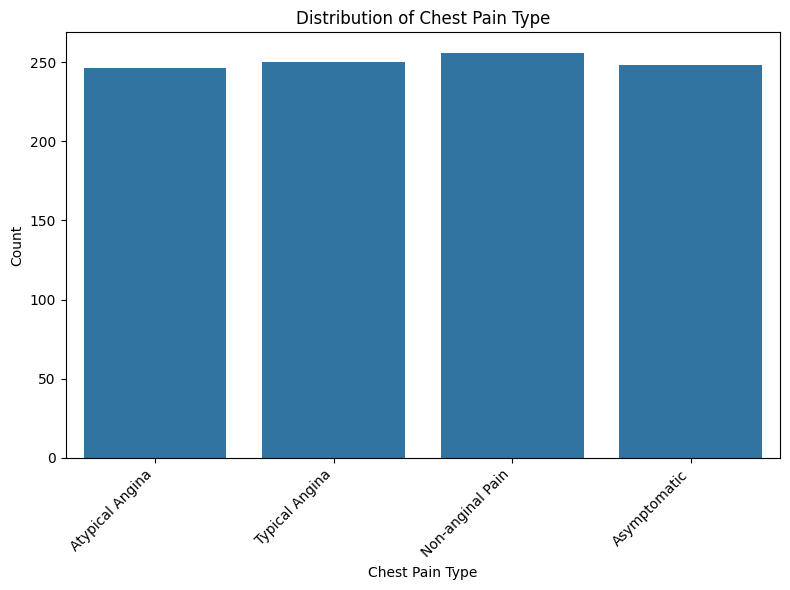

In [ ]:
# Select categorical columns from the original data for univariate analysis
categorical_cols_viz = data.select_dtypes(include='object').columns

# Create bar plots for categorical features
for col in categorical_cols_viz:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Bivariate Analysis: Relationships between Features and Heart Disease

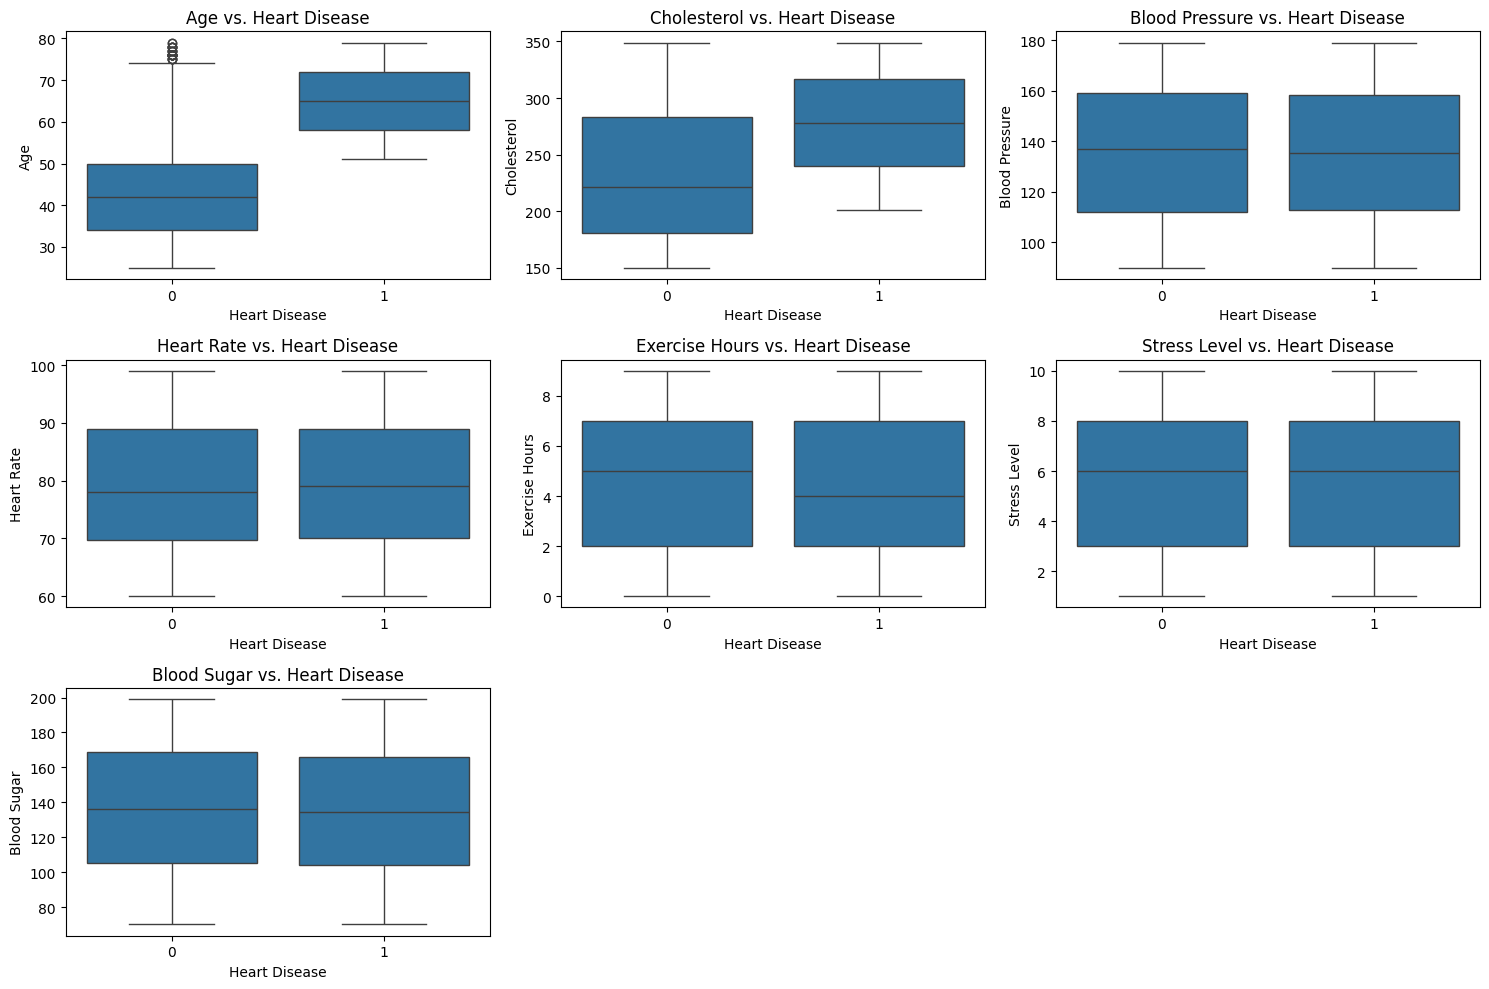

In [ ]:
# Create boxplots for numerical features against Heart Disease
numerical_cols_viz = data_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols_viz.remove('Heart Disease')

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data_encoded, x='Heart Disease', y=col)
    plt.title(f'{col} vs. Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

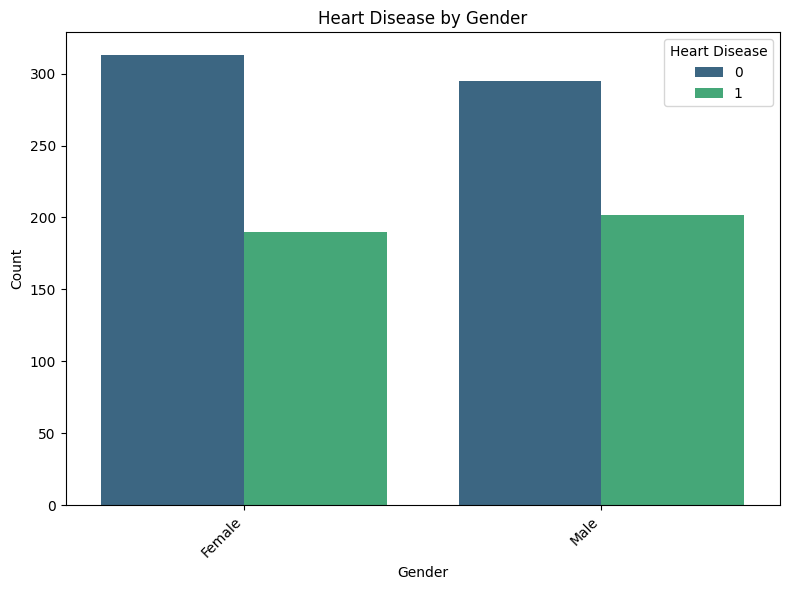

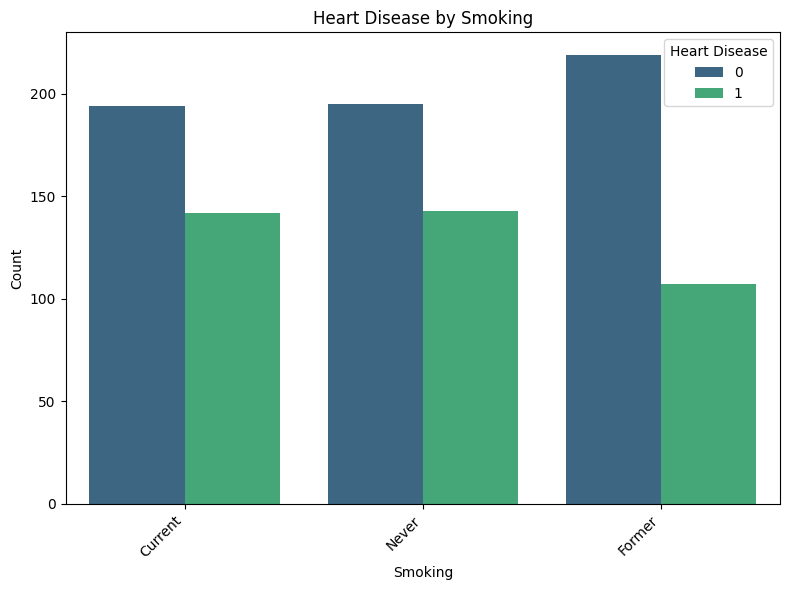

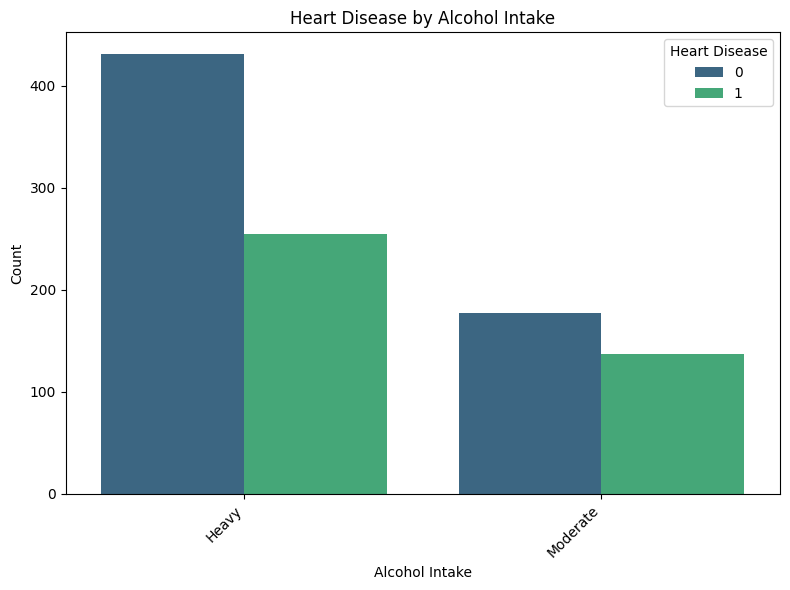

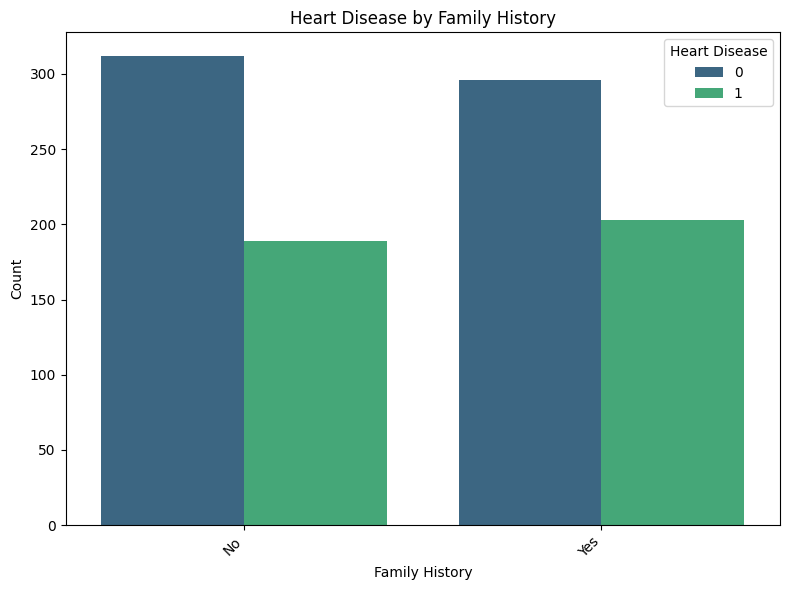

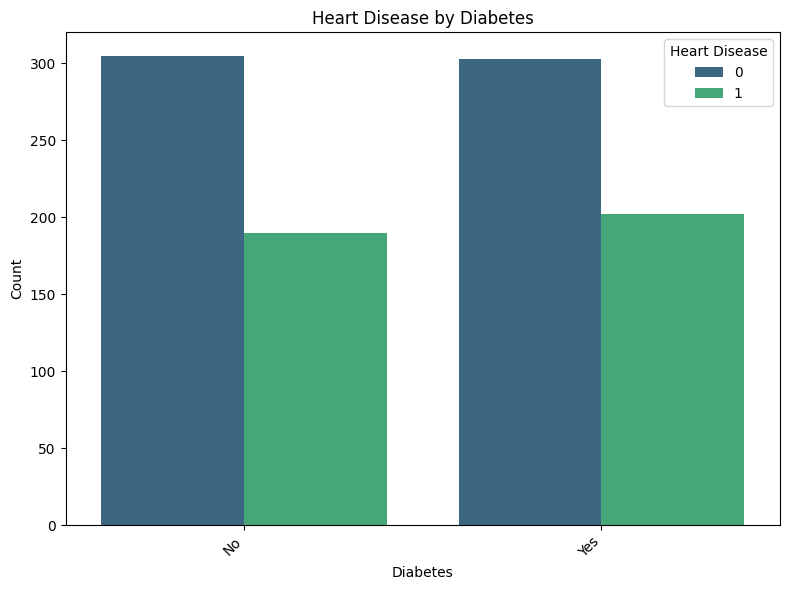

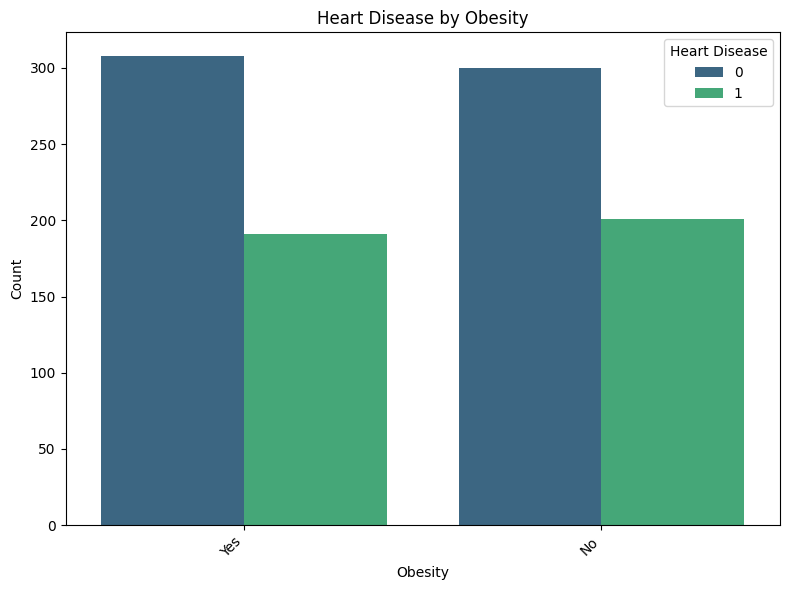

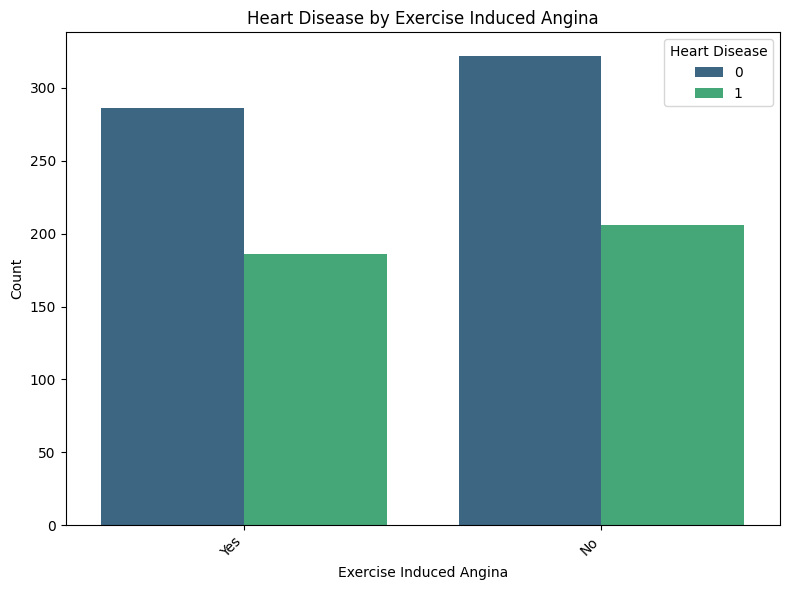

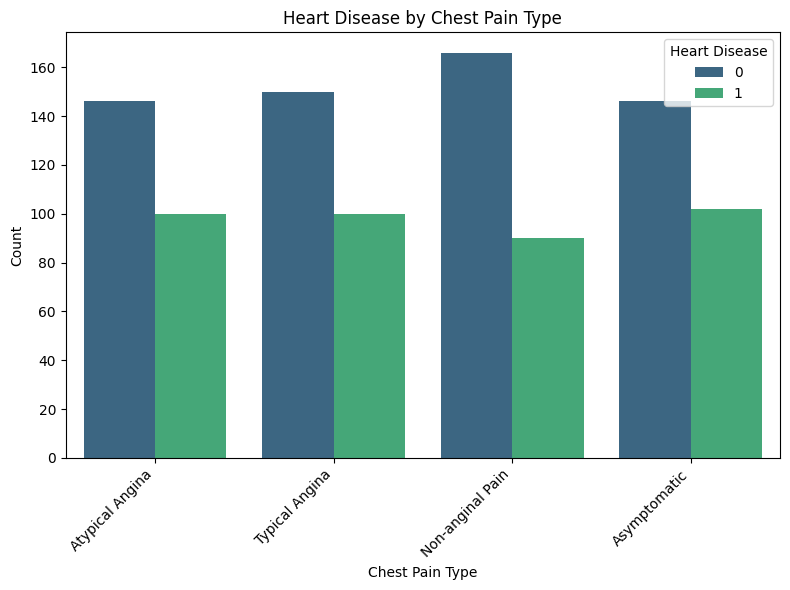

In [ ]:
# Create stacked bar plots for categorical features against Heart Disease
categorical_cols_viz = data.select_dtypes(include='object').columns

for col in categorical_cols_viz:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col, hue='Heart Disease', palette='viridis')
    plt.title(f'Heart Disease by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Summary of Findings from Visualizations:

Based on the performed visualizations, here are some key observations:

**Univariate Analysis:**

*   **Numerical Features:** The distributions of numerical features like Age, Cholesterol, Blood Pressure, Heart Rate, Exercise Hours, Stress Level, and Blood Sugar appear relatively spread out, with some showing slight skewness. The boxplots indicate the presence of outliers in some features, particularly in 'Cholesterol' and 'Blood Sugar'.
*   **Categorical Features:** The bar plots show the distribution of categories within each feature. For example, 'Gender', 'Family History', 'Diabetes', and 'Obesity' are relatively balanced, while 'Smoking' has a notable number of 'Never' smokers, and 'Alcohol Intake' is dominated by 'Heavy' intake. 'Chest Pain Type' and 'Exercise Induced Angina' also show variations in category counts.

**Bivariate Analysis (Relationships with Heart Disease):**

*   **Age:** The histogram showing Heart Disease prevalence by age suggests that the likelihood of heart disease increases with age, with a higher proportion of individuals with heart disease in older age groups. The boxplot confirms that individuals with heart disease tend to be older.
*   **Cholesterol:** The boxplot indicates that individuals with heart disease tend to have higher cholesterol levels.
*   **Other Numerical Features:** For other numerical features like Blood Pressure, Heart Rate, Exercise Hours, Stress Level, and Blood Sugar, the boxplots show some differences in distribution between those with and without heart disease, but the distinctions are not as pronounced as with Age and Cholesterol.
*   **Categorical Features:** The stacked bar plots reveal how heart disease prevalence varies across categories within each feature:
    *   **Gender:** There appears to be a slightly higher proportion of males with heart disease compared to females.
    *   **Smoking:** 'Former' smokers seem to have a higher count of heart disease compared to 'Current' and 'Never' smokers, though the proportions within each category are also important to consider.
    *   **Alcohol Intake:** 'Heavy' alcohol intake is associated with a higher count of individuals with heart disease compared to 'Moderate' intake.
    *   **Family History:** Individuals with a family history of heart disease show a higher count of heart disease cases.
    *   **Diabetes:** Individuals with diabetes have a higher count of heart disease cases.
    *   **Obesity:** Similar to Diabetes, obesity is associated with a higher count of heart disease cases.
    *   **Exercise Induced Angina:** Individuals who experience exercise-induced angina have a higher count of heart disease cases.
    *   **Chest Pain Type:** The distribution of heart disease varies across chest pain types, with 'Typical Angina' and 'Atypical Angina' showing a higher proportion of heart disease compared to 'Non-anginal Pain' and 'Asymptomatic'.

**Multivariate Analysis (Correlation Heatmap):**

*   The heatmap shows the correlations between all features.
*   'Age' and 'Cholesterol' show a notable positive correlation with 'Heart Disease'.
*   Some categorical features, after one-hot encoding, also show correlations with 'Heart Disease' (e.g., 'Family History_Yes', 'Diabetes_Yes', 'Obesity_Yes').
*   There are also correlations between some of the predictor variables themselves (e.g., between some of the 'Chest Pain Type' dummy variables, which is expected as they represent categories of the same feature).

**Overall Insights:**

The EDA reveals several factors that appear to be associated with a higher prevalence of heart disease in this dataset, including older age, higher cholesterol, family history of heart disease, diabetes, obesity, exercise-induced angina, and certain types of chest pain. Smoking and alcohol intake also show some association. These insights can be valuable in selecting features and building a predictive model for heart disease.